# Toy lexer generator in Python

## Lexer Generator


La primera parte de un generador de lexer es la especificación de los tokens del programa,
la cual se lleva a cabo mediante expresiones regulares. Las expresiones regulares que hemos 
definidos admiten las siguientes reglas:

- Operacion de union mediante `|`, concatenación implicita y estrella de Kleene mediante `*`.
- Cualquier caracter del alfabeto Unicode.
- Clases de caracteres, es decir,  expresiones del tipo `[a-z], [0-9], [zqe]`.

Teniendo en cuenta estas reglas, ahora definimos el siguiente formato del archivo de
especificación de tokens. En particular debe haber una especificación por linea y deben
tener la siguiente forma:

`<Nombre del token> -> <Expresión Regular>`

Ahora bien, el proceso mediante el cual se hace el lexer consiste en que para cada token se hacen los siguientes pasos:

1. Lee la cadena que representa la expresión regular, se pasa a notacion posfija y se construye un árbol de sintaxis abstracta.
2. Pasa el AST de la expresión regular a un Automata Finito No Determinista con transiciones epsilon (eps-AFN).

Estos procedimientos se realizan en el modulo `regex_to_nfa.py`

3. Posteriormente el eps-AFN se convierte a un Automata Finito Determinista mediante el algoritmo de Rabin–Scott basado en el conjunto de partes de los estados del automata eps-AFN.

Esto se realiza en el modulo `nfa_to_dfa.py`

## Json Lexer

In [9]:
from compiler_tools.lexer import get_dfas, lexical_analysis
from compiler_tools.visual_utils import draw_dfa

token_file = "input/json_tokens.txt"
json_example = "input/json_example.json"

La especificación informal de los tokens es la siguiente:

- Parentesis y signos de puntuación se definen por sus respectivos caracteres.
- `Strings` son cadenas de caracteres que empiezan y terminan con comillas dobles,
dentro de estas pueden haber letras, números, caracteres en blanco y el caracter `_`.
- `Boolean` corresponde a las cadenas `true` y `false`.
- `Number`son el 0 o enteros que empiezan con un digito distintos de 0.
- `Null` corresponde a la cadena `null`.

A continuación se muestra la especificación formal de los tokens para los objetos JSON:

In [6]:
with open(token_file, "r") as f:
    print(f.read())

LEFT_BRACE -> {
RIGHT_BRACE -> }
LEFT_SQUARE_BRACE -> [
RIGHT_SQUARE_BRACE -> ]
COMMA -> ,
COLON -> :
STRING -> "[ _0-9a-zA-Z]*"
BOOLEAN -> true|false
NUMBER -> 0|[1-9][0-9]*
NULL -> null



De aqui podemos obtener los dfas correspondientes a cada token:

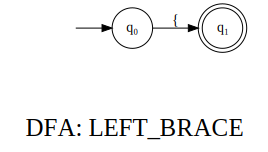

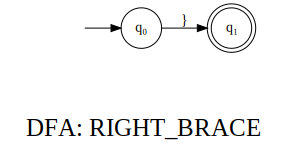

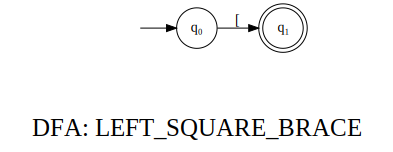

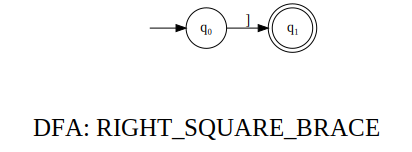

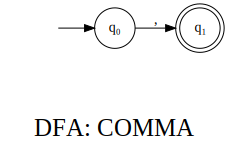

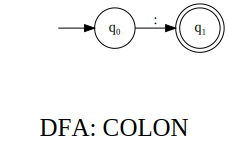

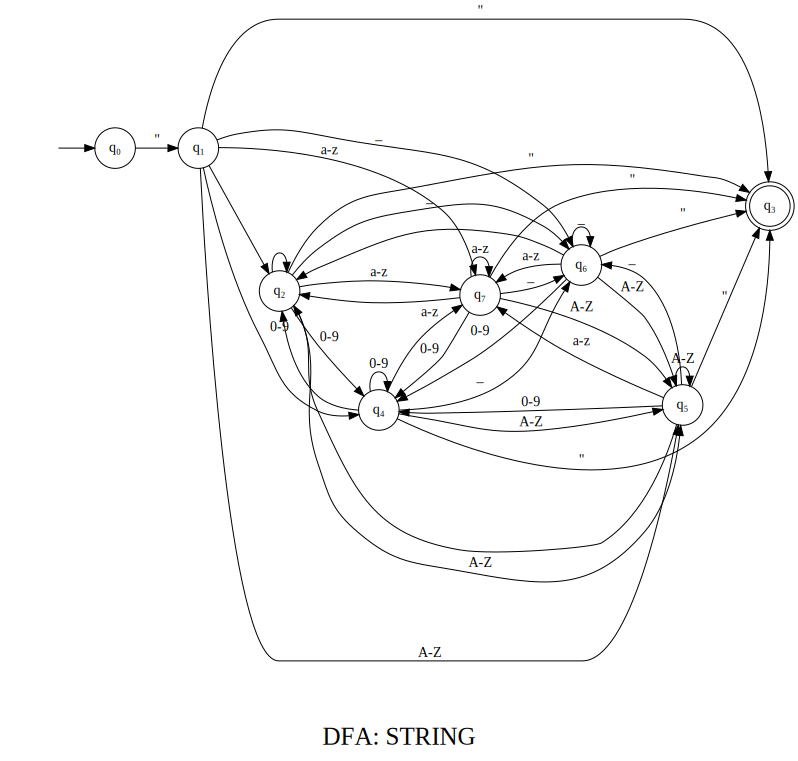

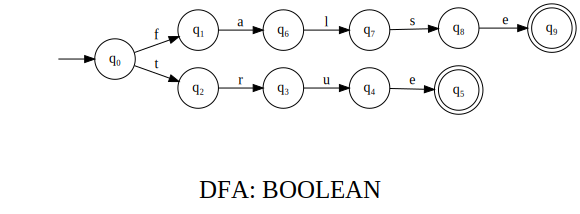

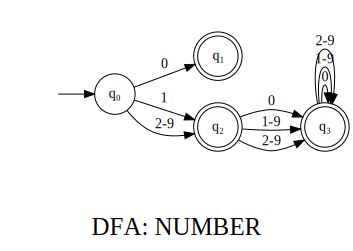

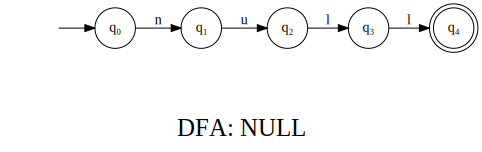

In [7]:
dfas = get_dfas(token_file)
for dfa in dfas:
    display(draw_dfa(dfa, title=dfa["token_name"]))

Ahora vamos a correr el lexer con el siguiente ejemplo:

In [8]:
with open(json_example, "r") as f:
    print(f.read())

{
    "glossary": {
        "title": "example glossary",
		"GlossDiv": {
            "title": "S",
			"GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
					"SortAs": "SGML",
					"GlossTerm": "Standard Generalized Markup Language",
					"Acronym": "SGML",
					"Abbrev": "ISO 88791986",
					"GlossDef": {
                        "para": "A metamarkup language used to create markup languages such as DocBook",
						"GlossSeeAlso": ["GML", "XML"]
                    },
					"GlossSee": "markup"
                }
            }
        }
    }
}



In [13]:
token_info = lexical_analysis(token_file, json_example)

print("\n".join(token_info))

Tipo de token: LEFT_BRACE - Posición inicial: 1 - Posición final: 1 - Valor: {
Tipo de token: STRING - Posición inicial: 7 - Posición final: 16 - Valor: "glossary"
Tipo de token: COLON - Posición inicial: 17 - Posición final: 17 - Valor: :
Tipo de token: LEFT_BRACE - Posición inicial: 19 - Posición final: 19 - Valor: {
Tipo de token: STRING - Posición inicial: 29 - Posición final: 35 - Valor: "title"
Tipo de token: COLON - Posición inicial: 36 - Posición final: 36 - Valor: :
Tipo de token: STRING - Posición inicial: 38 - Posición final: 55 - Valor: "example glossary"
Tipo de token: COMMA - Posición inicial: 56 - Posición final: 56 - Valor: ,
Tipo de token: STRING - Posición inicial: 60 - Posición final: 69 - Valor: "GlossDiv"
Tipo de token: COLON - Posición inicial: 70 - Posición final: 70 - Valor: :
Tipo de token: LEFT_BRACE - Posición inicial: 72 - Posición final: 72 - Valor: {
Tipo de token: STRING - Posición inicial: 86 - Posición final: 92 - Valor: "title"
Tipo de token: COLON - P